## Load MNIST dataset

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

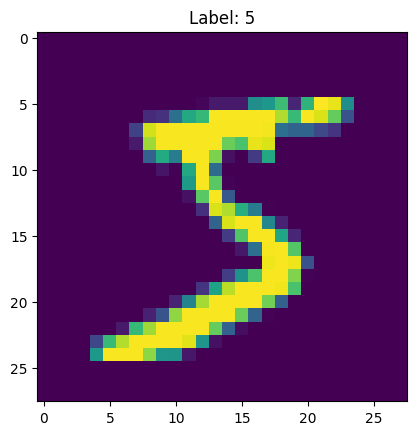

In [2]:
import matplotlib.pyplot as plt

image = train_images[0]
label = train_labels[0]
plt.imshow(image) 
plt.title(f"Label: {label}")
plt.show()

## ข้อ 1. 

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


## ข้อ 2.

In [4]:
print(train_images.shape[1:])

(28, 28)


In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## ข้อ 3

In [6]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## ข้อ 4.

Input:   28 × 28 grayscale image

Layer 1: Convolution (3 × 3 kernel, 30 filters, stride = 1, relu activation, use padding)

Layer 2: MaxPooling (2 × 2, stride = 2)

Layer 3: Convert feature maps into an input vector 

Layer 4: Hidden Layer (64, relu)

Output: Dense (10, softmax)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(
            filters=30, 
            kernel_size=(3, 3), 
            strides=1, 
            activation='relu', 
            padding='same', 
            name='Layer1'),
        MaxPooling2D(
            pool_size=(2, 2),
            strides=2,
            name='Layer2'
        ),
        Flatten(name='Layer3'),
        Dense(
            units=64,
            activation='relu',
            name='Layer4'
        ),
        Dense(
            units=10,
            activation='softmax',
            name='Output'
        )
    ], name='MiniCNN')

model.summary()

Model: "MiniCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer1 (Conv2D)                 │ (None, 28, 28, 30)     │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer2 (MaxPooling2D)           │ (None, 14, 14, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer3 (Flatten)                │ (None, 5880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer4 (Dense)                  │ (None, 64)             │       376,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,334 (1.44 MB)

 Trainable params: 377,334 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

## ข้อ 5.

optimizer =  'sgd'  , loss = 'categorical cross entropy' and learning rate = 0.005

In [8]:
from tensorflow.keras.optimizers import SGD
lr = SGD(learning_rate = 0.005)

model.compile(
    optimizer = lr,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],    
)

## ข้อ 6.

In [9]:
hist = model.fit(
    train_images, Y_train,
    epochs = 50,
    batch_size = 64,
)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7715 - loss: 4.6594
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9600 - loss: 0.1286
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9702 - loss: 0.0944
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9759 - loss: 0.0772
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9799 - loss: 0.0649
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9825 - loss: 0.0555
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9867 - loss: 0.0445
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9870 - loss: 0.0396
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9894 - loss: 0.0344
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9913 - loss: 0.0257
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9930 - loss: 0.0220
Epoch 12/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step

In [10]:
print(sum(hist.history['loss'])) 

1.6737180136115057


## ข้อ 7.

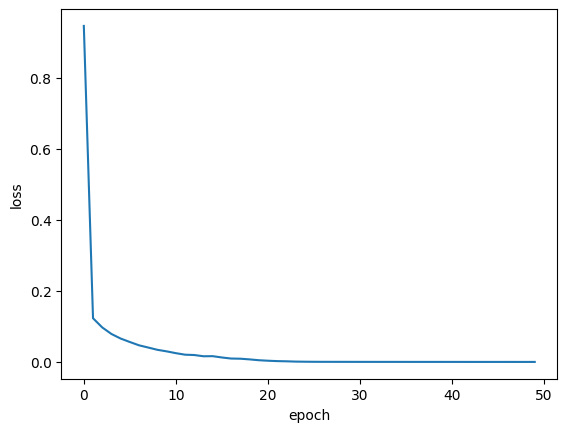

In [11]:
import matplotlib.pyplot as plt 

plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## ข้อ 8.   

In [36]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [37]:
# Normalize [0 - 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## ข้อ 9. 

In [38]:
# สร้างโมเดล LeNet-5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Conv2D(filters=6, kernel_size=(5,5), strides=1, padding='valid', activation='relu', input_shape=(32,32,3), name='conv1'),
    MaxPooling2D(pool_size=(2,2), strides=2, name='pool1'),
    Conv2D(filters=16, kernel_size=(5,5), strides=1, padding='valid', activation='relu', name='conv2'),
    MaxPooling2D(pool_size=(2,2), strides=2, name='pool2'),
    Flatten(name='flatten'),
    Dense(120, activation='relu', name='fc1'),
    Dense(84, activation='relu', name='fc2'),
    Dense(10, activation='softmax', name='output')
], name = 'LeNet-5')

model.summary()

Model: "LeNet-5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

## ข้อ 11. 

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2607 - loss: 2.0129 - val_accuracy: 0.3980 - val_loss: 1.6479
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4227 - loss: 1.5960 - val_accuracy: 0.4568 - val_loss: 1.5066
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4661 - loss: 1.4773 - val_accuracy: 0.4892 - val_loss: 1.4275
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4887 - loss: 1.4248 - val_accuracy: 0.5086 - val_loss: 1.3883
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5129 - loss: 1.3642 - val_accuracy: 0.5200 - val_loss: 1.3403
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5322 - loss: 1.3075 - val_accuracy: 0.5378 - val_loss: 1.3144
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5398 - loss: 1.2903 - val_accuracy: 0.5488 - val_loss: 1.2841
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5610 - loss: 1.2358 - val_accu

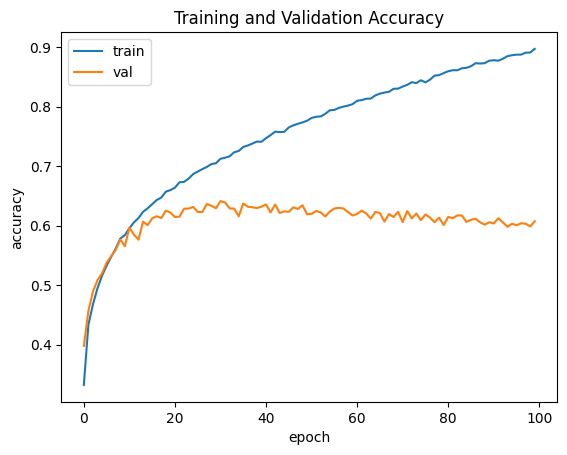

In [39]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt 

lr = Adam(learning_rate=0.0005)

model.compile(
    optimizer = lr,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

hist = model.fit(
    x_train, y_train,
    epochs = 100,
    batch_size = 128,
    validation_split = 0.1,
    verbose = 1
)
  
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.show()